### Pandas for neuroimaging

In [1]:
import pandas as pd

In [3]:
subjects = pd.read_csv(
"https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
usecols=[1,2,3,4,5,6,7],
na_values="NaN", index_col=0)

In [8]:
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0
subject_001,31,Male,NaN,129.0,58.0,74.0
subject_002,18,Female,NaN,130.0,63.0,70.0
subject_003,28,Male,Right,NaN,NaN,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN


In [10]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, subject_000 to subject_076
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         77 non-null     int64  
 1   Gender      76 non-null     object 
 2   Handedness  66 non-null     object 
 3   IQ          63 non-null     float64
 4   IQ_Matrix   63 non-null     float64
 5   IQ_Vocab    63 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ KB


In [24]:
subjects.describe()

,Age,IQ,IQ_Matrix,IQ_Vocab
count,77.000000,63.000000,63.000000,63.000000
mean,18.961039,122.142857,60.539683,64.015873
std,12.246849,12.717599,7.448372,8.125015
min,6.000000,92.000000,41.000000,36.000000
25%,9.000000,114.000000,57.000000,60.000000
50%,14.000000,122.000000,61.000000,64.000000
75%,28.000000,130.000000,64.500000,70.000000
max,50.000000,151.000000,76.000000,80.000000


In [38]:
means = subjects.mean(numeric_only=True)
means

Age           18.961039
IQ           122.142857
IQ_Matrix     60.539683
IQ_Vocab      64.015873
dtype: float64

In [26]:
subjects.loc["subject_000"]

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

In [34]:
subjects.iloc[2:5,:]

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_002,18,Female,NaN,130.0,63.0,70.0
subject_003,28,Male,Right,NaN,NaN,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN


In [36]:
subjects.loc["subject_005":"subject_010", ["Age", "Gender"]]

,Age,Gender
subjectID,,
subject_005,36,Male
subject_006,39,Male
subject_007,34,Male
subject_008,24,Female
subject_009,21,Male
subject_010,29,Female


In [42]:
age_mean = subjects["Age"].mean()
age_std = subjects["Age"].std()
a = (subjects["Age"] - age_mean ) / age_std

In [52]:
subjects["Age standard"] = a
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age standard
subjectID,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,0.084835
subject_001,31,Male,NaN,129.0,58.0,74.0,0.983025
subject_002,18,Female,NaN,130.0,63.0,70.0,-0.078472
subject_003,28,Male,Right,NaN,NaN,NaN,0.738064
subject_004,29,Male,NaN,NaN,NaN,NaN,0.819718


In [56]:
subjects["IQ sub diff"] = subjects["IQ_Vocab"] - subjects["IQ_Matrix"]

In [58]:
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age standard,IQ sub diff
subjectID,,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,0.084835,12.0
subject_001,31,Male,NaN,129.0,58.0,74.0,0.983025,16.0
subject_002,18,Female,NaN,130.0,63.0,70.0,-0.078472,7.0
subject_003,28,Male,Right,NaN,NaN,NaN,0.738064,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN,0.819718,NaN


### Conditional

In [5]:
subjects["age_less_than_10"] = subjects["Age"] < 10
print(subjects["age_less_than_10"])

subjectID
subject_000    False
subject_001    False
subject_002    False
subject_003    False
subject_004    False
               ...  
subject_072    False
subject_073    False
subject_074    False
subject_075    False
subject_076    False
Name: age_less_than_10, Length: 77, dtype: bool


In [64]:
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age standard,IQ sub diff,age_less_than_10
subjectID,,,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,0.084835,12.0,False
subject_001,31,Male,NaN,129.0,58.0,74.0,0.983025,16.0,False
subject_002,18,Female,NaN,130.0,63.0,70.0,-0.078472,7.0,False
subject_003,28,Male,Right,NaN,NaN,NaN,0.738064,NaN,False
subject_004,29,Male,NaN,NaN,NaN,NaN,0.819718,NaN,False


In [69]:
a = subjects[subjects["age_less_than_10"]]
a.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age standard,IQ sub diff,age_less_than_10
subjectID,,,,,,,,,
subject_024,9,Male,Right,142.0,72.0,73.0,-0.813355,1.0,True
subject_026,8,Male,Right,125.0,67.0,61.0,-0.895009,-6.0,True
subject_028,7,Male,Right,146.0,76.0,73.0,-0.976663,-3.0,True
subject_029,8,Female,Right,107.0,57.0,51.0,-0.895009,-6.0,True
subject_033,9,Male,Right,132.0,64.0,71.0,-0.813355,7.0,True


In [79]:
b = subjects[subjects["IQ"] > 140]
b

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age standard,IQ sub diff,age_less_than_10
subjectID,,,,,,,,,
subject_024,9,Male,Right,142.0,72.0,73.0,-0.813355,1.0,True
subject_028,7,Male,Right,146.0,76.0,73.0,-0.976663,-3.0,True
subject_049,9,Male,Right,146.0,70.0,79.0,-0.813355,9.0,True
subject_052,9,Female,Right,151.0,74.0,80.0,-0.813355,6.0,True
subject_063,9,Male,Right,142.0,74.0,71.0,-0.813355,-3.0,True


###  MultiIndex DataFrame

In [86]:
multi_index = subjects.set_index(["Gender", "age_less_than_10"])
multi_index

Age Handedness     IQ  IQ_Matrix  IQ_Vocab  \
Gender age_less_than_10                                               
Male   False              20        NaN  139.0       65.0      77.0   
       False              31        NaN  129.0       58.0      74.0   
Female False              18        NaN  130.0       63.0      70.0   
Male   False              28      Right    NaN        NaN       NaN   
       False              29        NaN    NaN        NaN       NaN   
...                      ...        ...    ...        ...       ...   
       False              40      Right  134.0       68.0      69.0   
NaN    False              50        NaN    NaN        NaN       NaN   
Male   False              40      Right  122.0       62.0      63.0   
Female False              17      Right  118.0       55.0      65.0   
Male   False              17      Right  121.0       59.0      65.0   

                         Age standard  IQ sub diff  
Gender age_less_than_10                             
Male   False                 0.084835         12.0  
       False                 0.983025         16.0  
Female False                -0.078472          7.0  
Male   False                 0.738064          NaN  
       False                 0.819718          NaN  
...                               ...          ...  
       False                 1.717908          1.0  
NaN    False                 2.534445          NaN  
Male   False                 1.717908          1.0  
Female False                -0.160126         10.0  
Male   False                -0.160126          6.0  

[77 rows x 7 columns]

In [88]:
multi_index.loc["Male", True].mean(numeric_only=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\2811830132.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  multi_index.loc["Male", True].mean(numeric_only=True)


Age               8.285714
IQ              125.642857
IQ_Matrix        62.071429
IQ_Vocab         66.000000
Age standard     -0.871679
IQ sub diff       3.928571
dtype: float64

### Split-Apply-Combine

(1) take a data set and split it into subsets; 
(2) independently apply some operation to each subset; and 
(3) Combine the results of all the independent applications into a newdata set. 

You can use Groupby in pandas for this purpose

In the latest version of Pandas you have to specify numeric_only

In [32]:
age_df = subjects.groupby(["Gender"]).mean(numeric_only=True)

In [34]:
age_df

,Age,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10
Gender,,,,,
Female,18.351351,120.612903,59.419355,63.516129,0.297297
Male,18.743590,123.625000,61.625000,64.500000,0.358974


In [39]:
age_df = subjects.groupby(["Gender", "Handedness"]).mean(numeric_only=True)
age_df

Age          IQ  IQ_Matrix   IQ_Vocab  \
Gender Handedness                                                
Female Left        18.000000  111.500000  57.750000  55.250000   
       Right       18.034483  122.080000  59.800000  64.720000   
Male   Right       17.090909  122.413793  61.344828  63.517241   

                   age_less_than_10  
Gender Handedness                    
Female Left                0.000000  
       Right               0.379310  
Male   Right               0.424242

In [41]:
subjects["Adults"] = subjects["Age"] >= 18

In [47]:
age_df = subjects.groupby(["Gender", "Adults"]).mean(numeric_only=True)
age_df

Age          IQ  IQ_Matrix   IQ_Vocab  age_less_than_10
Gender Adults                                                               
Female False   10.523810  118.950000  58.550000  62.450000          0.523810
       True    28.625000  123.636364  61.000000  65.454545          0.000000
Male   False   10.166667  121.952381  60.428571  63.857143          0.583333
       True    32.466667  126.818182  63.909091  65.727273          0.000000

### Joining different tables

In [50]:
nodes = pd.read_csv(
'https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv',
index_col="subjectID",
usecols=["subjectID", "tractID", "nodeID", "fa"])

In [68]:
nodes.groupby(["subjectID", "tractID","nodeID"]).mean()

fa
subjectID   tractID                nodeID          
subject_000 Callosum Forceps Major 0       0.213573
                                   1       0.289814
                                   2       0.340877
                                   3       0.371039
                                   4       0.379193
...                                             ...
subject_076 Right Uncinate         95      0.291500
                                   96      0.282572
                                   97      0.270498
                                   98      0.228468
                                   99      0.177931

[154000 rows x 1 columns]

In [70]:
nodes.loc["subject_000"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, subject_000 to subject_000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tractID  2000 non-null   object 
 1   nodeID   2000 non-null   int64  
 2   fa       1996 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 62.5+ KB


In [74]:
nodes.loc["subject_000"]

,tractID,nodeID,fa
subjectID,,,
subject_000,Left Thalamic Radiation,0,0.183053
subject_000,Left Thalamic Radiation,1,0.247121
subject_000,Left Thalamic Radiation,2,0.306726
subject_000,Left Thalamic Radiation,3,0.343995
subject_000,Left Thalamic Radiation,4,0.373869
...,...,...,...
subject_000,Right Arcuate,95,0.387313
subject_000,Right Arcuate,96,0.361919
subject_000,Right Arcuate,97,0.310981


Now imagine we want to combine the nodes and subjects info. Their concatenation is not straight foward since you have multiple information for each subject. merge function is smarter than concat for complex ways of combining two dfs

In [77]:
nodes.head()

,tractID,nodeID,fa
subjectID,,,
subject_000,Left Thalamic Radiation,0,0.183053
subject_000,Left Thalamic Radiation,1,0.247121
subject_000,Left Thalamic Radiation,2,0.306726
subject_000,Left Thalamic Radiation,3,0.343995
subject_000,Left Thalamic Radiation,4,0.373869


In [79]:
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10,Adults
subjectID,,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,False,True
subject_001,31,Male,NaN,129.0,58.0,74.0,False,True
subject_002,18,Female,NaN,130.0,63.0,70.0,False,True
subject_003,28,Male,Right,NaN,NaN,NaN,False,True
subject_004,29,Male,NaN,NaN,NaN,NaN,False,True


In [81]:
joined = pd.merge(nodes, subjects, left_index=True, right_index=True)
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154000 entries, subject_000 to subject_076
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tractID           154000 non-null  object 
 1   nodeID            154000 non-null  int64  
 2   fa                152326 non-null  float64
 3   Age               154000 non-null  int64  
 4   Gender            152000 non-null  object 
 5   Handedness        132000 non-null  object 
 6   IQ                126000 non-null  float64
 7   IQ_Matrix         126000 non-null  float64
 8   IQ_Vocab          126000 non-null  float64
 9   age_less_than_10  154000 non-null  bool   
 10  Adults            154000 non-null  bool   
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 12.0+ MB


In [83]:
joined.head()

,tractID,nodeID,fa,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10,Adults
subjectID,,,,,,,,,,,
subject_000,Left Thalamic Radiation,0,0.183053,20,Male,NaN,139.0,65.0,77.0,False,True
subject_000,Left Thalamic Radiation,1,0.247121,20,Male,NaN,139.0,65.0,77.0,False,True
subject_000,Left Thalamic Radiation,2,0.306726,20,Male,NaN,139.0,65.0,77.0,False,True
subject_000,Left Thalamic Radiation,3,0.343995,20,Male,NaN,139.0,65.0,77.0,False,True
subject_000,Left Thalamic Radiation,4,0.373869,20,Male,NaN,139.0,65.0,77.0,False,True


In [85]:
age_groups = joined.groupby(["age_less_than_10", "tractID", "nodeID"])

In [91]:
x = age_groups.mean(numeric_only=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4000 entries, (False, 'Callosum Forceps Major', 0) to (True, 'Right Uncinate', 99)
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fa         4000 non-null   float64
 1   Age        4000 non-null   float64
 2   IQ         4000 non-null   float64
 3   IQ_Matrix  4000 non-null   float64
 4   IQ_Vocab   4000 non-null   float64
 5   Adults     4000 non-null   float64
dtypes: float64(6)
memory usage: 200.3+ KB


In [95]:
below_10_means = x.loc[(False, "Left Cingulum Cingulate")]
above_10_means = x.loc[(True, "Left Cingulum Cingulate")]

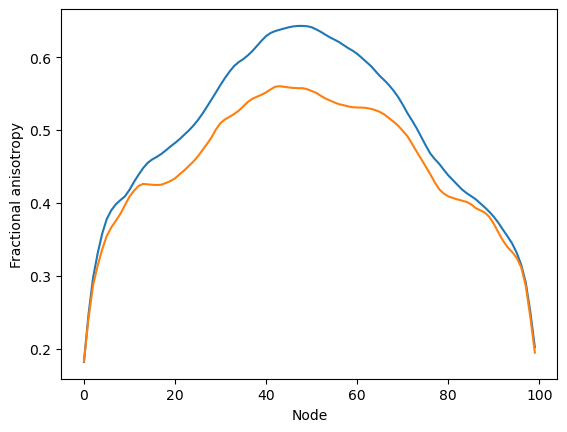

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(below_10_means["fa"])
ax.plot(above_10_means["fa"])
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional anisotropy")

Exercises

How would you go about comparing the development of male and female subjects in this
part of the brain?Howwould you compare younger children to the othersubjects in other
tracts?

In [100]:
age_groups = joined.groupby(["Gender", "tractID", "nodeID"])

In [102]:
x = age_groups.mean(numeric_only=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4000 entries, ('Female', 'Callosum Forceps Major', 0) to ('Male', 'Right Uncinate', 99)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fa                4000 non-null   float64
 1   Age               4000 non-null   float64
 2   IQ                4000 non-null   float64
 3   IQ_Matrix         4000 non-null   float64
 4   IQ_Vocab          4000 non-null   float64
 5   age_less_than_10  4000 non-null   float64
 6   Adults            4000 non-null   float64
dtypes: float64(7)
memory usage: 231.6+ KB


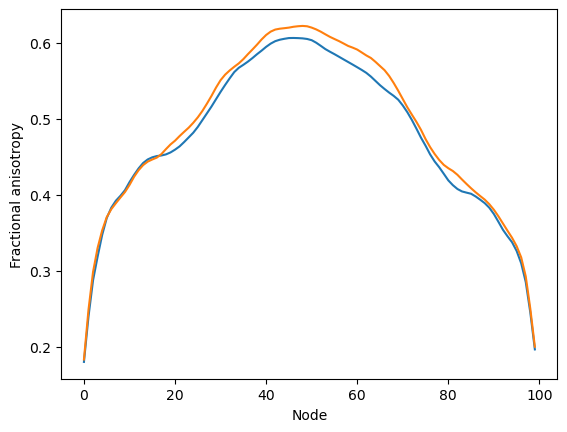

In [106]:
F = x.loc[("Female", "Left Cingulum Cingulate")]
M = x.loc[("Male", "Left Cingulum Cingulate")]

fig, ax = plt.subplots()
ax.plot(F["fa"])
ax.plot(M["fa"])
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional anisotropy")